# Data Cleaning
---

Data cleaning is the process of preparing data for analysis / ML / DL by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.

Outlier is a things like exceptional. Example: In a company, salary of a ceo is greater than any other employe, so in that case salary of a CEO consider as a outlier.

### Steps:-

- Handling Missing Data
- Outlier Detection and Handling
- Data Scaling and Transformation
- Encoding Categorical Variables
- Handling Duplicates
- Dealing wiith inconsistent Data

##### Import csv file
---

In [36]:
import pandas as pd

dataset = pd.read_csv(r"../DATA/products.csv")

dataset.head(10)

,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61.0,NaN,12.56
1,2,All-Seasons Salt,104.0,13.0,28.86
2,3,Robust Golden Unsweetened Oolong Tea,94.0,7.0,25.67
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38.0,1.0,39.60
4,5,Green Chile Anytime Sauce,5.0,13.0,42.96
5,6,Dry Nose Oil,11.0,11.0,40.04
6,7,Pure Coconut Water With Orange,98.0,7.0,24.82
7,8,Cut Russet Potatoes Steam N' Mash,116.0,1.0,22.46
8,9,Light Strawberry Blueberry Yogurt,120.0,16.0,17.62
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115.0,7.0,10.89


##### Handling Missing Value
---

Missing data is like not mandatory data from a database i mean its a optional data. \
Missing data consider as
- Null
- NaN (Not a Number)
- Blank

- `If data missing is more than 50% then we should not use that dataset`
- `If data missing is more than 50% in a cloumn than we should drop that column`

In [3]:
# dataset shape
dataset.shape

(999, 5)

In [15]:
dataset.isnull().sum()

product_id       0
product_name     0
aisle_id         1
department_id    0
price            0
dtype: int64

In [17]:
# % calculation

(dataset.isnull().sum()/dataset.shape[0])*100

product_id       0.0000
product_name     0.0000
aisle_id         0.1001
department_id    0.0000
price            0.0000
dtype: float64

In [18]:
# total % calculation

(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(0.02002002002002002)

In [19]:
# Find the not null

dataset.notnull().sum()

product_id       999
product_name     999
aisle_id         998
department_id    999
price            999
dtype: int64

<Axes: >

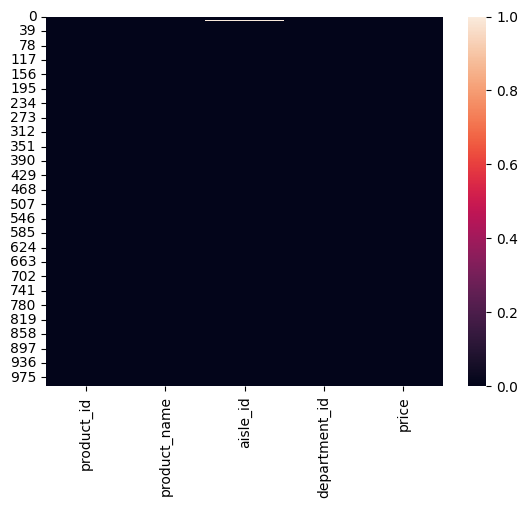

In [ ]:
# missingg value in graph
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dataset.isnull())

#### Drop 
---

In [35]:
# drop multiple column and return the new dataset and not modify the orginal dataset when inplace is false but if innplace is True then it will modify the original dataset and not return anything
dataset.drop(columns=["aisle_id",	"department_id"],inplace=True)

In [40]:
dataset.head(10)

,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61.0,19,12.56
1,2,All-Seasons Salt,104.0,13,28.86
2,3,Robust Golden Unsweetened Oolong Tea,94.0,7,25.67
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38.0,1,39.60
4,5,Green Chile Anytime Sauce,5.0,13,42.96
5,6,Dry Nose Oil,11.0,11,40.04
6,7,Pure Coconut Water With Orange,98.0,7,24.82
7,8,Cut Russet Potatoes Steam N' Mash,116.0,1,22.46
8,9,Light Strawberry Blueberry Yogurt,120.0,16,17.62
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115.0,7,10.89


In [ ]:
# dropna is used for delete missing value
# Default is removing the roe consider of atleast one NaN value
dataset.dropna(inplace=True) 

In [42]:
dataset

,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61.0,19,12.56
1,2,All-Seasons Salt,104.0,13,28.86
2,3,Robust Golden Unsweetened Oolong Tea,94.0,7,25.67
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38.0,1,39.60
4,5,Green Chile Anytime Sauce,5.0,13,42.96
...,...,...,...,...,...
994,995,Sausage Smoked Sweet German Brand,106.0,12,19.09
995,996,Honey Cinnamon Nut-Thins Crackers,125.0,19,32.26
996,997,Mini Double Chocolate Ice Cream Bars,37.0,1,19.48
997,998,Hot Chopped Green Chili,104.0,13,22.06


In [43]:
dataset.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
price            0
dtype: int64

In [44]:
dataset.shape

(998, 5)

|Data Filling
---
---

- mean --> `df.mean()` || mean of that column data
- median --> `df.median()` || chose the median value after sorted the column from decending to assending order data
- mode --> `df.mode()` || chose the most frequency data
- backward --> `df.fillna(method="ffill", inplace=True, axis=0)` 0 for rowwise
- forward --> `df.fillna(method="bfill", inplace=True, axis=1)` 1 for columnwise

axis=0 for row
axis=1 for column
inplace=True for modify the original dataframe
inplace=False for return the new dataframe and not modify the original dataframe and default is False

Data types in machine learnnning\
|\
|--Categorical-->Object
|     
|--Numerical-->int64 and float64

---

In [7]:
# Filling NaN value with fillna(value)
dataset.fillna(10).head(10)

,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61.0,10.0,12.56
1,2,All-Seasons Salt,104.0,13.0,28.86
2,3,Robust Golden Unsweetened Oolong Tea,94.0,7.0,25.67
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38.0,1.0,39.60
4,5,Green Chile Anytime Sauce,5.0,13.0,42.96
5,6,Dry Nose Oil,11.0,11.0,40.04
6,7,Pure Coconut Water With Orange,98.0,7.0,24.82
7,8,Cut Russet Potatoes Steam N' Mash,116.0,1.0,22.46
8,9,Light Strawberry Blueberry Yogurt,120.0,16.0,17.62
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115.0,7.0,10.89


In [ ]:
dataset.info()

In [38]:
dataset["department_id"].mode()[0]

np.float64(11.0)

uses the mode() function in pandas to find the most frequently occurring (i.e., mode) values in the `department_id` column.

In [42]:
dataset.fillna({"department_id": dataset["department_id"].mode()[0]}, inplace=True)
# or dataset["department_id"] = dataset["department_id"].fillna(dataset["department_id"].mode()[0])

In [43]:
dataset

,product_id,product_name,aisle_id,department_id,price
0,1,Chocolate Sandwich Cookies,61.0,11.0,12.56
1,2,All-Seasons Salt,104.0,13.0,28.86
2,3,Robust Golden Unsweetened Oolong Tea,94.0,7.0,25.67
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38.0,1.0,39.60
4,5,Green Chile Anytime Sauce,5.0,13.0,42.96
...,...,...,...,...,...
994,995,Sausage Smoked Sweet German Brand,106.0,12.0,19.09
995,996,Honey Cinnamon Nut-Thins Crackers,125.0,19.0,32.26
996,997,Mini Double Chocolate Ice Cream Bars,37.0,1.0,19.48
997,998,Hot Chopped Green Chili,104.0,13.0,22.06


In [46]:
dataset.select_dtypes(include="float64")

,aisle_id,department_id,price
0,61.0,11.0,12.56
1,104.0,13.0,28.86
2,94.0,7.0,25.67
3,38.0,1.0,39.60
4,5.0,13.0,42.96
...,...,...,...
994,106.0,12.0,19.09
995,125.0,19.0,32.26
996,37.0,1.0,19.48
997,104.0,13.0,22.06


In [48]:
dataset["product_name"].mode()[0]

'100% Columbian Coffee'

In [ ]:
dataset.dropna

In [ ]:
for i in dataset.select_dtypes(include="object").columns:
  dataset[i].fillna(dataset[i].mode()[0], inplace=True)

# Loop wise mod filling data
---

In [ ]:
import pandas as pd
def modFill(datset=pd.DataFrame({})):
  for i in dataset.select_dtypes(include="int64").columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=False)

  for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=False)

  for i in dataset.select_dtypes(include="float64").columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=False)
  
  return dataset